In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

def writeLog(row):
    with open('log.txt', 'a') as outfile:
        outfile.write(row + '\n')

def getErrMsg(e):
    error_class = e.__class__.__name__ #取得錯誤類型
    detail = e.args[0] #取得詳細內容
    errMsg = "[{}] {}".format(error_class, detail)
    return errMsg

In [3]:
columns = read_json('../orderdListGenres.json')
print(len(columns), columns)

20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


# 儲存路徑

In [4]:
SAVE_NAME = 'Round_1'
HISTORY_SAVE = './history/' + SAVE_NAME + '.csv'
WEIGHTS_SAVE = './weight/' + SAVE_NAME + '.h5'

# Load data

In [5]:
train_data = pd.read_csv('./csv/computed_2018.csv')
train_data

,Movie,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_norm,A_std_norm,B_avg_norm,B_std_norm,C_avg_norm,C_std_norm,D_avg_norm,D_std_norm
0,tt0328810,74.324324,77.632556,7.429596e+06,6.754840e+06,0.336424,0.335943,8309.913009,4659.362101,0.007298,0.023854,0.006342,0.000935,0.445638,0.832754,0.533451,0.483734
1,tt10005184,128.111111,168.813141,1.056263e+06,2.578889e+06,0.099732,0.170803,5180.699115,2028.150559,0.014906,0.051871,0.000902,0.000357,0.132108,0.423395,0.327074,0.210562
2,tt10017502,31.970588,14.597512,3.220428e+06,6.070315e+06,0.268349,0.325218,3663.755048,2106.268326,0.001307,0.004485,0.002749,0.000840,0.355463,0.806169,0.227029,0.218672
3,tt10043732,41.670732,28.350616,5.971663e+06,1.710160e+07,0.315923,0.330436,4184.885640,3340.768941,0.002679,0.008711,0.005097,0.002367,0.418481,0.819104,0.261399,0.346838
4,tt10048096,28.480000,27.728859,1.167823e+07,2.226350e+07,0.296425,0.314294,4229.213104,2424.473662,0.000813,0.008520,0.009969,0.003081,0.392654,0.779089,0.264322,0.251708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,tt9866700,140.034483,81.652114,1.034090e+06,2.018781e+06,0.115961,0.170274,5452.573097,3761.139541,0.016593,0.025089,0.000883,0.000279,0.153606,0.422083,0.345005,0.390481
1401,tt9879080,83.636364,51.821850,1.771188e+06,2.408702e+06,0.058649,0.080815,1852.817936,1417.178866,0.008615,0.015923,0.001512,0.000333,0.077689,0.200329,0.107595,0.147131
1402,tt9891764,32.716981,19.979119,7.569638e+06,1.308621e+07,0.243142,0.287351,4391.310240,2942.670602,0.001412,0.006139,0.006461,0.001811,0.322074,0.712302,0.275013,0.305507
1403,tt9904014,108.547619,73.594838,3.773972e+05,6.156485e+05,0.339983,0.243896,2960.448579,2322.644041,0.012139,0.022613,0.000322,0.000085,0.450352,0.604582,0.180645,0.241136


In [6]:
train_label = pd.read_csv('./csv/filename2genreMat_2018.csv')
train_label

,id,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0328810,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,tt10005184,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt10017502,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,tt10043732,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,tt10048096,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,tt9866700,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1401,tt9879080,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1402,tt9891764,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1403,tt9904014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
test_data = pd.read_csv('./csv/computed_2019.csv')
test_data

,Movie,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_norm,A_std_norm,B_avg_norm,B_std_norm,C_avg_norm,C_std_norm,D_avg_norm,D_std_norm
0,47metersdown,34.804878,23.842184,1.191448e+07,3.059149e+07,0.245187,0.249696,3839.297159,3297.384679,0.071101,0.066649,0.031517,0.040032,0.452157,0.471848,0.379584,0.835915
1,adogsjourneymovie,34.632479,29.109753,2.695759e+06,4.626123e+06,0.335291,0.348500,3266.022091,2096.407257,0.069522,0.097831,0.006578,0.005443,0.718553,0.868171,0.291833,0.363484
2,aftermathmovie,35.692308,26.611911,7.428488e+05,1.455065e+06,0.204024,0.259721,3211.875123,2616.735866,0.079233,0.083045,0.001295,0.001219,0.330456,0.512062,0.283545,0.568167
3,aftermovie,58.276596,54.904056,5.679151e+06,1.419376e+07,0.212422,0.231199,3176.910267,2106.883693,0.286168,0.250527,0.014649,0.018188,0.355284,0.397654,0.278193,0.367605
4,alitamovie,35.784314,29.192272,2.569164e+06,6.429860e+06,0.266729,0.269028,2843.780762,2350.997308,0.080076,0.098320,0.006235,0.007846,0.515845,0.549392,0.227201,0.463632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,43.010204,52.851833,2.260180e+06,6.481499e+06,0.175488,0.220206,3454.562570,3247.741628,0.146285,0.238378,0.005400,0.007915,0.246087,0.353559,0.320693,0.816387
93,whatmenwant,32.086957,19.626320,2.003662e+07,5.276056e+07,0.241500,0.260970,6006.485656,2582.258884,0.046198,0.041692,0.053489,0.069564,0.441256,0.517072,0.711315,0.554604
94,wonderparkmovie,27.282443,13.193380,1.571109e+08,4.445462e+08,0.430486,0.331031,5563.594289,2771.415032,0.002175,0.003610,0.424310,0.591465,1.000000,0.798101,0.643522,0.629013
95,xmenmovies,41.549296,33.954729,4.791049e+06,1.487502e+07,0.319549,0.279627,2953.689532,2301.564008,0.132899,0.126512,0.012246,0.019096,0.672010,0.591908,0.244025,0.444187


In [8]:
test_label = pd.read_csv('./csv/filename2genreMat_2019.csv')
test_label

,filename,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown.mp4,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,aftermovie.mp4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,alitamovie.mp4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie.mp4,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
93,whatmenwant.mp4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
94,wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,xmenmovies.mp4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
print(train_data.shape,test_data.shape)
print(train_label.shape,test_label.shape)
# print(train_data.isnull().sum())
# print(test_data.isnull().sum())

(1405, 17) (97, 17)
(1405, 21) (97, 21)


In [10]:
val_data = train_data.sample(frac = 0.2,random_state = 42)
train_data = train_data.drop(val_data.index)
print(train_data.shape, val_data.shape)

(1124, 17) (281, 17)


In [11]:
val_label = train_label.loc[val_data.index, :]
train_label = train_label.drop(val_data.index)
print(train_label.shape, val_label.shape)

(1124, 21) (281, 21)


In [12]:
train_x = train_data.iloc[:, 9:17].to_numpy()
val_x = val_data.iloc[:, 9:17].to_numpy()
test_x = test_data.iloc[:, 9:17].to_numpy()

train_y = train_label.iloc[:, 1:21].to_numpy()
val_y = val_label.iloc[:, 1:21].to_numpy()
test_y = test_label.iloc[:, 1:21].to_numpy()

print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(1124, 8) (1124, 20)
(281, 8) (281, 20)
(97, 8) (97, 20)


In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape = (8, )))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(20, activation='sigmoid'))

model.summary()

Using TensorFlow backend.
/home/tonylab/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tonylab/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tonylab/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tonylab/.local/lib/python3.6/site-packages/tensorflow/py

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               4608      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                660       
Total params: 75,060
Trainable params: 75,060
Non-trainable params: 0
_________________________________________________________________


In [14]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

adam = Adam(lr=1e-3)

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])

callbacks = [EarlyStopping(monitor='val_loss')]

history = model.fit(train_x, train_y, 
                    batch_size=32, epochs=100, verbose=1, 
                    validation_data=(val_x, val_y), 
                    callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 1124 samples, validate on 281 samples
Epoch 1/100
1124/1124 [==============================] - 1s 665us/step - loss: 0.5213 - acc: 0.8211 - val_loss: 0.3458 - val_acc: 0.8884
Epoch 2/100
1124/1124 [==============================] - 0s 55us/step - loss: 0.3305 - acc: 0.8921 - val_loss: 0.3255 - val_acc: 0.8884
Epoch 3/100
1124/1124 [==============================] - 0s 56us/step - loss: 0.3219 - acc: 0.8908 - val_loss: 0.3242 - val_acc: 0.8884
Epoch 4/100
1124/1124 [==============================] - 0s 56us/step - loss: 0.3194 - acc: 0.8922 - val_loss: 0.3224 - val_acc: 0.8884
Epoch 5/100
1124/1124 [==============================] - 0s 56us/step - loss: 0.3187 - acc: 0.8915 - val_loss: 0.3202 - val_acc: 0.8895
Epoch 6/100
1124/1124 [==============================] - 0s 55us/step - loss: 0.3174 - acc: 0.8921 - val_loss: 0.3195 - val_acc: 0.8883
Epoch 7/100
1124/1124 [==============================] - 0s 54us/step - loss: 0.3172 - a

In [15]:
# save model weights
model.save(WEIGHTS_SAVE)

In [16]:
# save history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

his_df = pd.DataFrame(data = {
    'Epoch' : epochs,
    'Loss' : loss,
    'Acc' : acc,
    'Val_loss' : val_loss,
    'Val_acc' : val_acc
})
his_df = his_df[['Epoch', 'Loss', 'Acc', 'Val_loss', 'Val_acc']]
his_df.to_csv(HISTORY_SAVE, index = False)

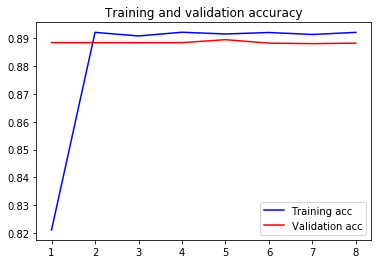

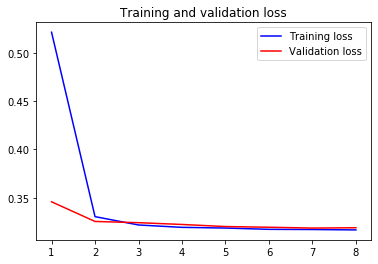

In [17]:
# 繪製結果
import matplotlib.pyplot as plt

# plt.figure()

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

# plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing

In [18]:
pred = model.predict(test_x, verbose = 1)

97/97 [==============================] - 0s 189us/step


In [19]:
pred.shape

(97, 20)

In [20]:
results=pd.DataFrame(pred, columns=columns)
results["username"] = test_data.Movie
ordered_cols = ["username"] + columns
results = results[ordered_cols] #To get the same column order
results.to_csv("./output/"+ SAVE_NAME + "_result.csv",index=False)

## Label top n dynamic

In [21]:
true_df = test_label
true_df

,filename,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown.mp4,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,aftermovie.mp4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,alitamovie.mp4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie.mp4,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
93,whatmenwant.mp4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
94,wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,xmenmovies.mp4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
results = pd.read_csv("./output/"+ SAVE_NAME + "_result.csv")
results

,username,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.119250,0.096392,0.047392,0.062632,0.146807,0.078715,0.051790,0.415449,0.060697,...,0.080276,0.078918,0.063183,0.048623,0.079876,0.054974,0.057950,0.094694,0.053019,0.063818
1,adogsjourneymovie,0.151276,0.087210,0.058087,0.064588,0.136714,0.090656,0.046152,0.429558,0.077892,...,0.066727,0.093169,0.059156,0.066144,0.078160,0.063081,0.077512,0.127443,0.060540,0.054982
2,aftermathmovie,0.114936,0.104319,0.046542,0.066129,0.149134,0.090393,0.062814,0.444487,0.069651,...,0.086790,0.096181,0.074606,0.055966,0.088939,0.055337,0.055859,0.117188,0.059477,0.068644
3,aftermovie,0.103280,0.088161,0.039020,0.062717,0.147504,0.095608,0.067551,0.452776,0.072688,...,0.081376,0.093488,0.070010,0.053088,0.081497,0.044566,0.045668,0.124782,0.054474,0.059349
4,alitamovie,0.139210,0.106296,0.057101,0.074695,0.156142,0.102631,0.062469,0.441668,0.082444,...,0.086668,0.106936,0.075275,0.069303,0.091955,0.065600,0.070619,0.136478,0.067991,0.069528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.082687,0.088679,0.029611,0.052251,0.136173,0.076068,0.057619,0.446232,0.051645,...,0.077310,0.077817,0.064756,0.038303,0.073645,0.037506,0.034137,0.097189,0.044374,0.056258
93,whatmenwant,0.148910,0.083221,0.065789,0.066961,0.157656,0.071819,0.053231,0.382842,0.069235,...,0.080459,0.064982,0.056871,0.049639,0.083442,0.061739,0.083080,0.073869,0.052145,0.065432
94,wonderparkmovie,0.159291,0.054699,0.072961,0.049465,0.103772,0.035356,0.021010,0.245775,0.049339,...,0.057740,0.028225,0.019629,0.034971,0.047888,0.045753,0.090033,0.022444,0.027320,0.054906
95,xmenmovies,0.150927,0.098157,0.059772,0.074734,0.155396,0.103484,0.057259,0.435598,0.084572,...,0.079665,0.103882,0.069111,0.071613,0.086703,0.066718,0.076168,0.139564,0.067245,0.063202


In [23]:
labels = read_json('../genresDic.json')

In [24]:
def countAcc(predList, trueList):
    fraction = 0
    denominator = len(trueList)
    for g in predList:
        if g in trueList:
            fraction += 1 
    return fraction / denominator

In [25]:
li = []
for i, row in true_df.iterrows():
    username = row['filename'].split('.')[0]
    if username == results.loc[i,:]['username']: # username equals
        print(i, username)
        truth = labels[username]
        numTrue = sum(row[1:])
        print('count:', numTrue)
        
        s = results.loc[i,:][1:]
        top_n = s.sort_values(ascending=False)[:numTrue]
        inList = list(top_n.index)
        
        onehot = []
        for g in columns:
            onehot.append(int(g in inList))
            
        acc = countAcc(inList, truth)
        print(acc, inList, truth)
        
        appList = [username, acc, truth, inList] + onehot
        li.append(appList)
        

0 47metersdown
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Adventure', 'Drama', 'Horror']
1 adogsjourneymovie
count: 3
0.6666666666666666 ['Drama', 'Action', 'Comedy'] ['Adventure', 'Comedy', 'Drama']
2 aftermathmovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Thriller'] ['Drama', 'Romance', 'War']
3 aftermovie
count: 2
0.5 ['Drama', 'Comedy'] ['Drama', 'Romance']
4 alitamovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Action', 'Adventure', 'Sci-Fi']
5 angelhasfallen
count: 2
0.0 ['Drama', 'Comedy'] ['Action', 'Thriller']
6 angrybirdsmovie
count: 3
0.0 ['Drama', 'Action', 'Sport'] ['Adventure', 'Animation', 'Comedy']
7 annabellemovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Thriller'] ['Horror', 'Mystery', 'Thriller']
8 annamovie
count: 2
0.0 ['Drama', 'Comedy'] ['Action', 'Thriller']
9 apollo11movie
count: 2
0.0 ['Drama', 'Comedy'] ['Documentary', 'History']
10 arcticmovie
count: 2
0.5 ['Drama', 'Thriller'] ['Adventure', 'Drama']
11 artof

In [26]:
acc_df = pd.DataFrame(li, columns = ['username', 'acc', 'truth', 'top_n'] + columns)
acc_df

,username,acc,truth,top_n,Action,Adventure,Animation,Biography,Comedy,Crime,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.333333,"[Adventure, Drama, Horror]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,adogsjourneymovie,0.666667,"[Adventure, Comedy, Drama]","[Drama, Action, Comedy]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,aftermathmovie,0.333333,"[Drama, Romance, War]","[Drama, Comedy, Thriller]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,aftermovie,0.500000,"[Drama, Romance]","[Drama, Comedy]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,alitamovie,0.333333,"[Action, Adventure, Sci-Fi]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.333333,"[Horror, Mystery, Thriller]","[Drama, Comedy, Thriller]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
93,whatmenwant,0.333333,"[Comedy, Fantasy, Romance]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
94,wonderparkmovie,0.333333,"[Adventure, Animation, Comedy]","[Drama, Action, Comedy]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
95,xmenmovies,0.333333,"[Action, Adventure, Sci-Fi]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
acc_df.to_csv("./output/"+ SAVE_NAME + "_bi.csv", index = 0)

In [28]:
acc_df['acc'].mean()

0.40034364261168387